## USIU Navigation pROJECT

In [13]:
%pip freeze > requirements.txt 

In [1]:
import osmnx as ox
import folium
import matplotlib.pyplot as plt

ox.config(use_cache=True)

c:\Users\mxmug\Desktop\SHULE\APT3010A\PROJECT\venv\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
uni_place = 'USIU Africa, Kenya'
# uni = ox.geocode_to_gdf(uni_place)
# ax = ox.project_gdf(uni).plot()
# draw = ax.axis('off')

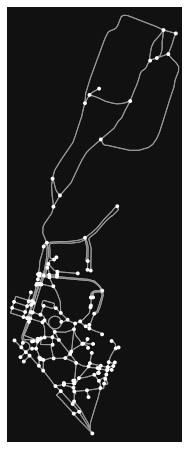

Index(['osmid', 'highway', 'service', 'oneway', 'reversed', 'length',
       'geometry'],
      dtype='object')
Index(['y', 'x', 'street_count', 'highway', 'geometry'], dtype='object')


In [3]:
uni_streets = ox.graph_from_place(uni_place, network_type="walk")
# print(uni_streets.edges(keys=True, data=True))
G = ox.get_undirected(uni_streets)
ox.plot_graph(uni_streets)
edge_attributes = ox.graph_to_gdfs(uni_streets, nodes=False).columns
print(edge_attributes)

node_attributes = ox.graph_to_gdfs(uni_streets, edges=False).columns
print(node_attributes)

In [4]:
# list to label the nodes
listo = [i for i in range(1,len(uni_streets.nodes()) + 1)]
print(listo)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]


In [5]:
# key buildings, parking etc
key_nodes = [6, 83, 47, 8, 9, 109, 157, 73, 107, 44, 156, 130, 10, 141, 2, 99, 112, 87, 155, 69, 144, 68, 12, 108, 119, 127, 139, 105, 126, 76, 54, 118, 15]
loc_names = [
    'main_gate',
    'admin_parking',
    'transport_office',
    'admin_block',
    'lilian_beam_building',
    'cafeteria',
    'admin_sitting_area',
    'hostels',
    'cafelatta',
    'main_lab',
    'chandaria_biz_sch',
    'library',
    'auditorium',
    'cafelatta_parking_lot',
    'bus_park',
    'basketball_court',
    'auditorium_parking',
    'students_centre',
    'science_complex',
    'new_school_of_humanities',
    'visiting_faculty_building',
    'school_of_comm_and_cinematic_arts',
    'lilian_beam_parking',
    'KCB_lilian_beam',
    'student_centre_parking',
    'swimming_pool',
    'swimming_parking',
    'laundry',
    'science_complex_parking',
    'gate_b',
    'football_pitch',
    'rugby_field',
    'school_of_art',
    ]
new_labels = [num if num in key_nodes else '' for num in listo]
print(new_labels)

['', 2, '', '', '', 6, '', 8, 9, 10, '', 12, '', '', 15, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 44, '', '', 47, '', '', '', '', '', '', 54, '', '', '', '', '', '', '', '', '', '', '', '', '', 68, 69, '', '', '', 73, '', '', 76, '', '', '', '', '', '', 83, '', '', '', 87, '', '', '', '', '', '', '', '', '', '', '', 99, '', '', '', '', '', 105, '', 107, 108, 109, '', '', 112, '', '', '', '', '', 118, 119, '', '', '', '', '', '', 126, 127, '', '', 130, '', '', '', '', '', '', '', '', 139, '', 141, '', '', 144, '', '', '', '', '', '', '', '', '', '', 155, 156, 157, '']


In [6]:
# location and node dictionary
location_dict = dict(zip(key_nodes,loc_names))
print(location_dict)
len(location_dict)

{6: 'main_gate', 83: 'admin_parking', 47: 'transport_office', 8: 'admin_block', 9: 'lilian_beam_building', 109: 'cafeteria', 157: 'admin_sitting_area', 73: 'hostels', 107: 'cafelatta', 44: 'main_lab', 156: 'chandaria_biz_sch', 130: 'library', 10: 'auditorium', 141: 'cafelatta_parking_lot', 2: 'bus_park', 99: 'basketball_court', 112: 'auditorium_parking', 87: 'students_centre', 155: 'science_complex', 69: 'new_school_of_humanities', 144: 'visiting_faculty_building', 68: 'school_of_comm_and_cinematic_arts', 12: 'lilian_beam_parking', 108: 'KCB_lilian_beam', 119: 'student_centre_parking', 127: 'swimming_pool', 139: 'swimming_parking', 105: 'laundry', 126: 'science_complex_parking', 76: 'gate_b', 54: 'football_pitch', 118: 'rugby_field', 15: 'school_of_art'}


33

In [7]:
name_labels = [location_dict.get(num) if num in location_dict.keys() else '' for num in new_labels]
print(name_labels)

['', 'bus_park', '', '', '', 'main_gate', '', 'admin_block', 'lilian_beam_building', 'auditorium', '', 'lilian_beam_parking', '', '', 'school_of_art', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'main_lab', '', '', 'transport_office', '', '', '', '', '', '', 'football_pitch', '', '', '', '', '', '', '', '', '', '', '', '', '', 'school_of_comm_and_cinematic_arts', 'new_school_of_humanities', '', '', '', 'hostels', '', '', 'gate_b', '', '', '', '', '', '', 'admin_parking', '', '', '', 'students_centre', '', '', '', '', '', '', '', '', '', '', '', 'basketball_court', '', '', '', '', '', 'laundry', '', 'cafelatta', 'KCB_lilian_beam', 'cafeteria', '', '', 'auditorium_parking', '', '', '', '', '', 'rugby_field', 'student_centre_parking', '', '', '', '', '', '', 'science_complex_parking', 'swimming_pool', '', '', 'library', '', '', '', '', '', '', '', '', 'swimming_parking', '', 'cafelatta_parking_lot', '', '', 'visiting_facu

In [8]:
import numpy as np
# convert to Geopandas dataframe 
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
# add new node info to dataframe
nodes['label'] = listo
nodes['newlbls'] = new_labels
nodes['names'] = name_labels
edges['length2'] = np.round(edges['length'])
# print(nodes.head(10))
# nodes['key_points'] = new_labels

# convert to node view - graph
G = ox.graph_from_gdfs(nodes,edges)

# print(G.nodes(data=True))
# # mini_version = ['r' if nodes[nodes['label'].isin(key_nodes)] else 'none' for node in G.nodes()]
# print(mini_version)
# # set_knodes = set(key_nodes)
# # set_nodes = set(listo)
# # r_set = set_nodes - set_knodes
# # print(set_knodes)
# # print(set_nodes)
# # print(r_set)
# # print(mini_version)
# # nodes
# # G = ox.graph_from_gdfs(nodes,edges)
# # G = ox.graph_from_gdfs(mini_version,edges)
# # G3 = G.remove_nodes_from(r_set)
# # print(len(G3.nodes))
# # df = ox.graph_to_gdfs(G, nodes=True, edges=True)
# # print(df)


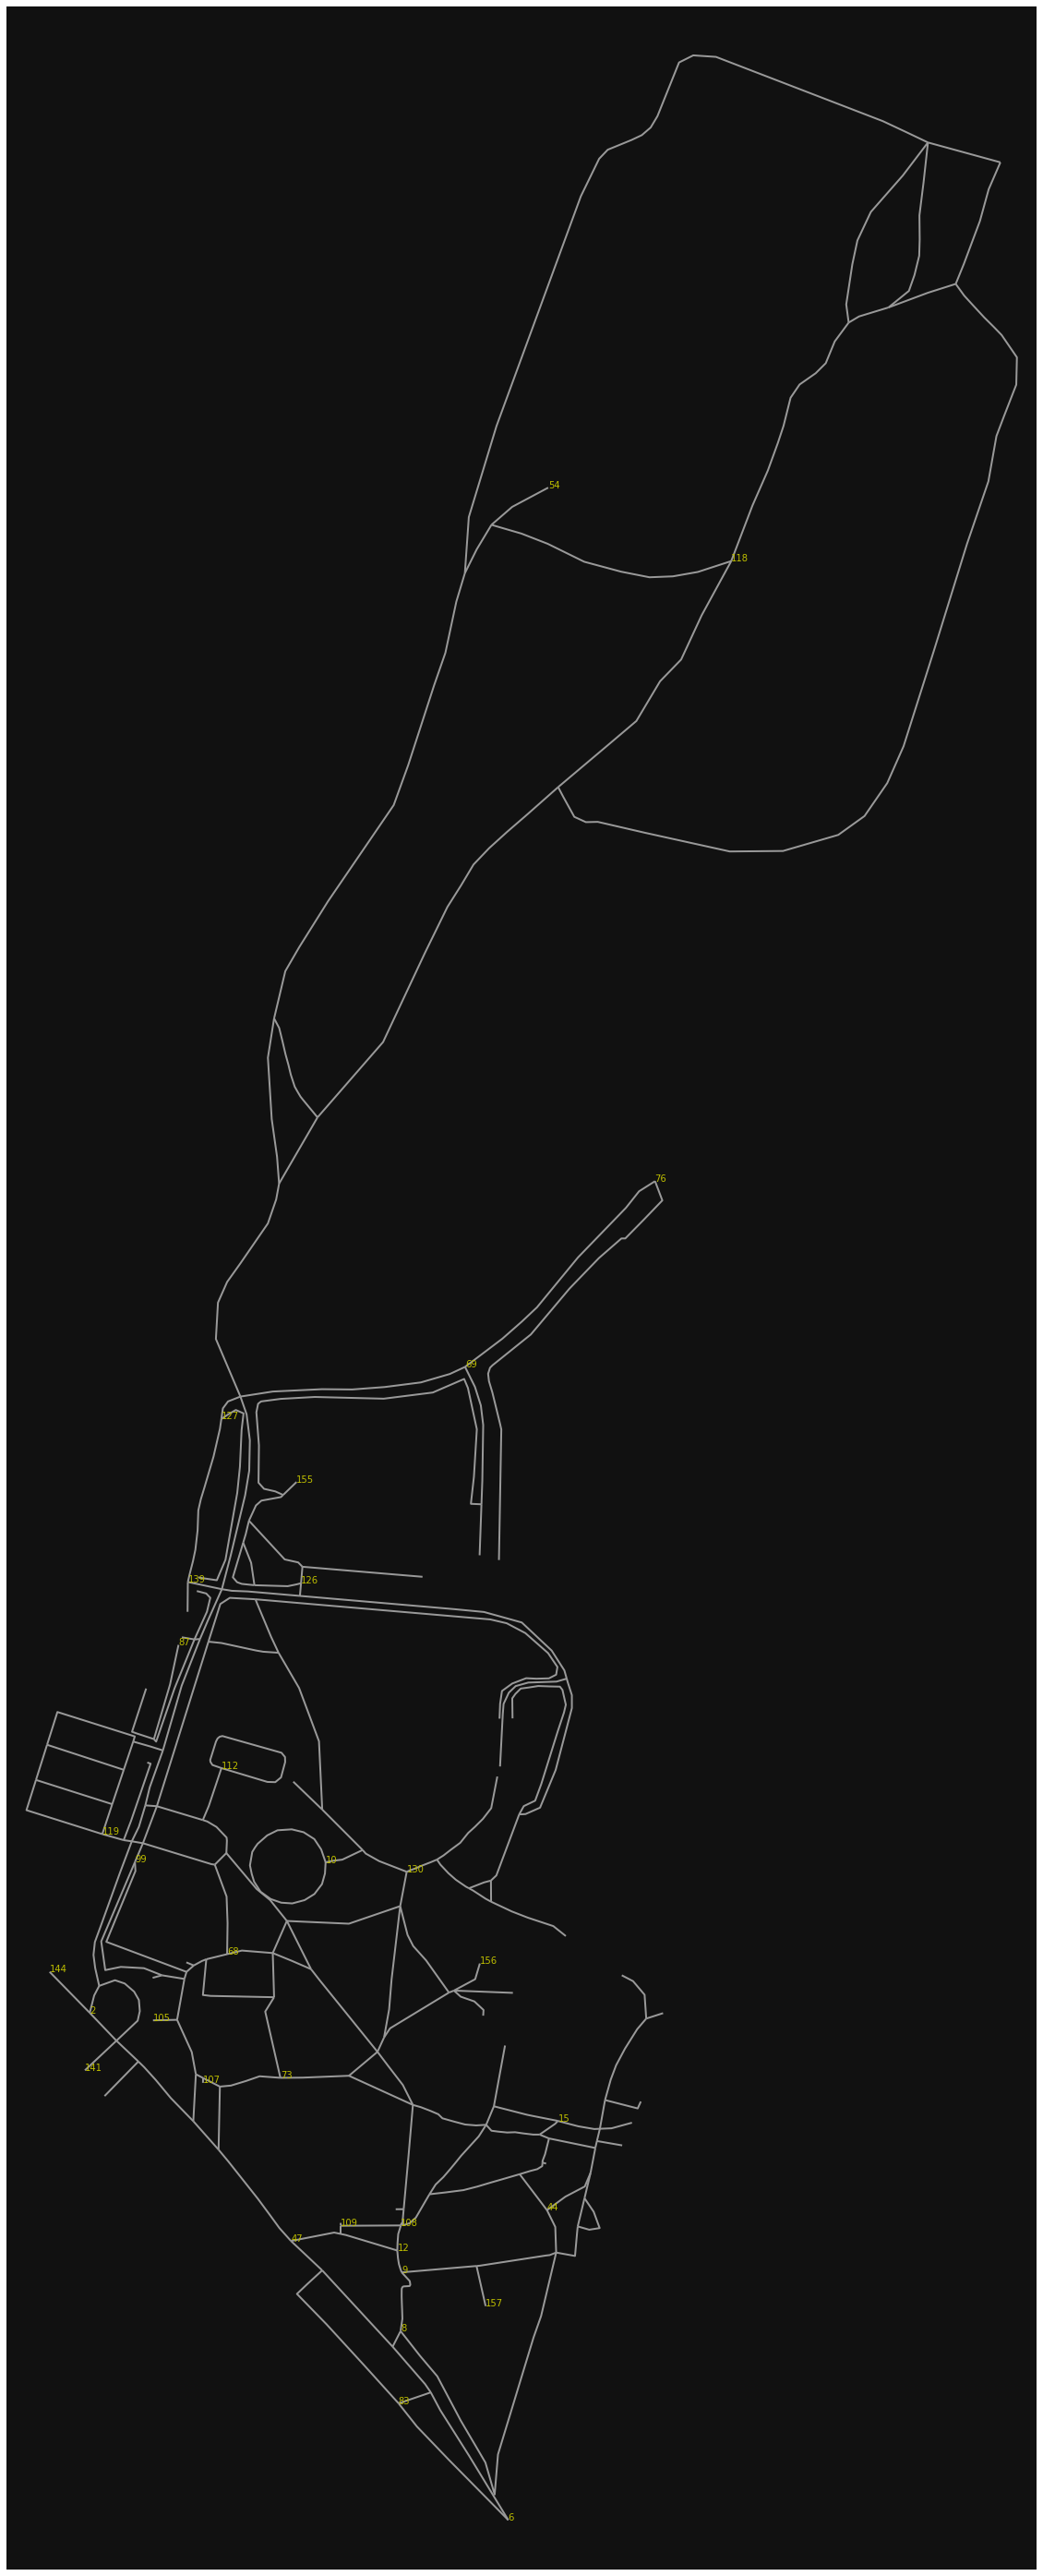

In [9]:
#  draw the map with key nodes
fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, node in ox.graph_to_gdfs(G, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = node['newlbls']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')
plt.show()
#     print(node['label'])

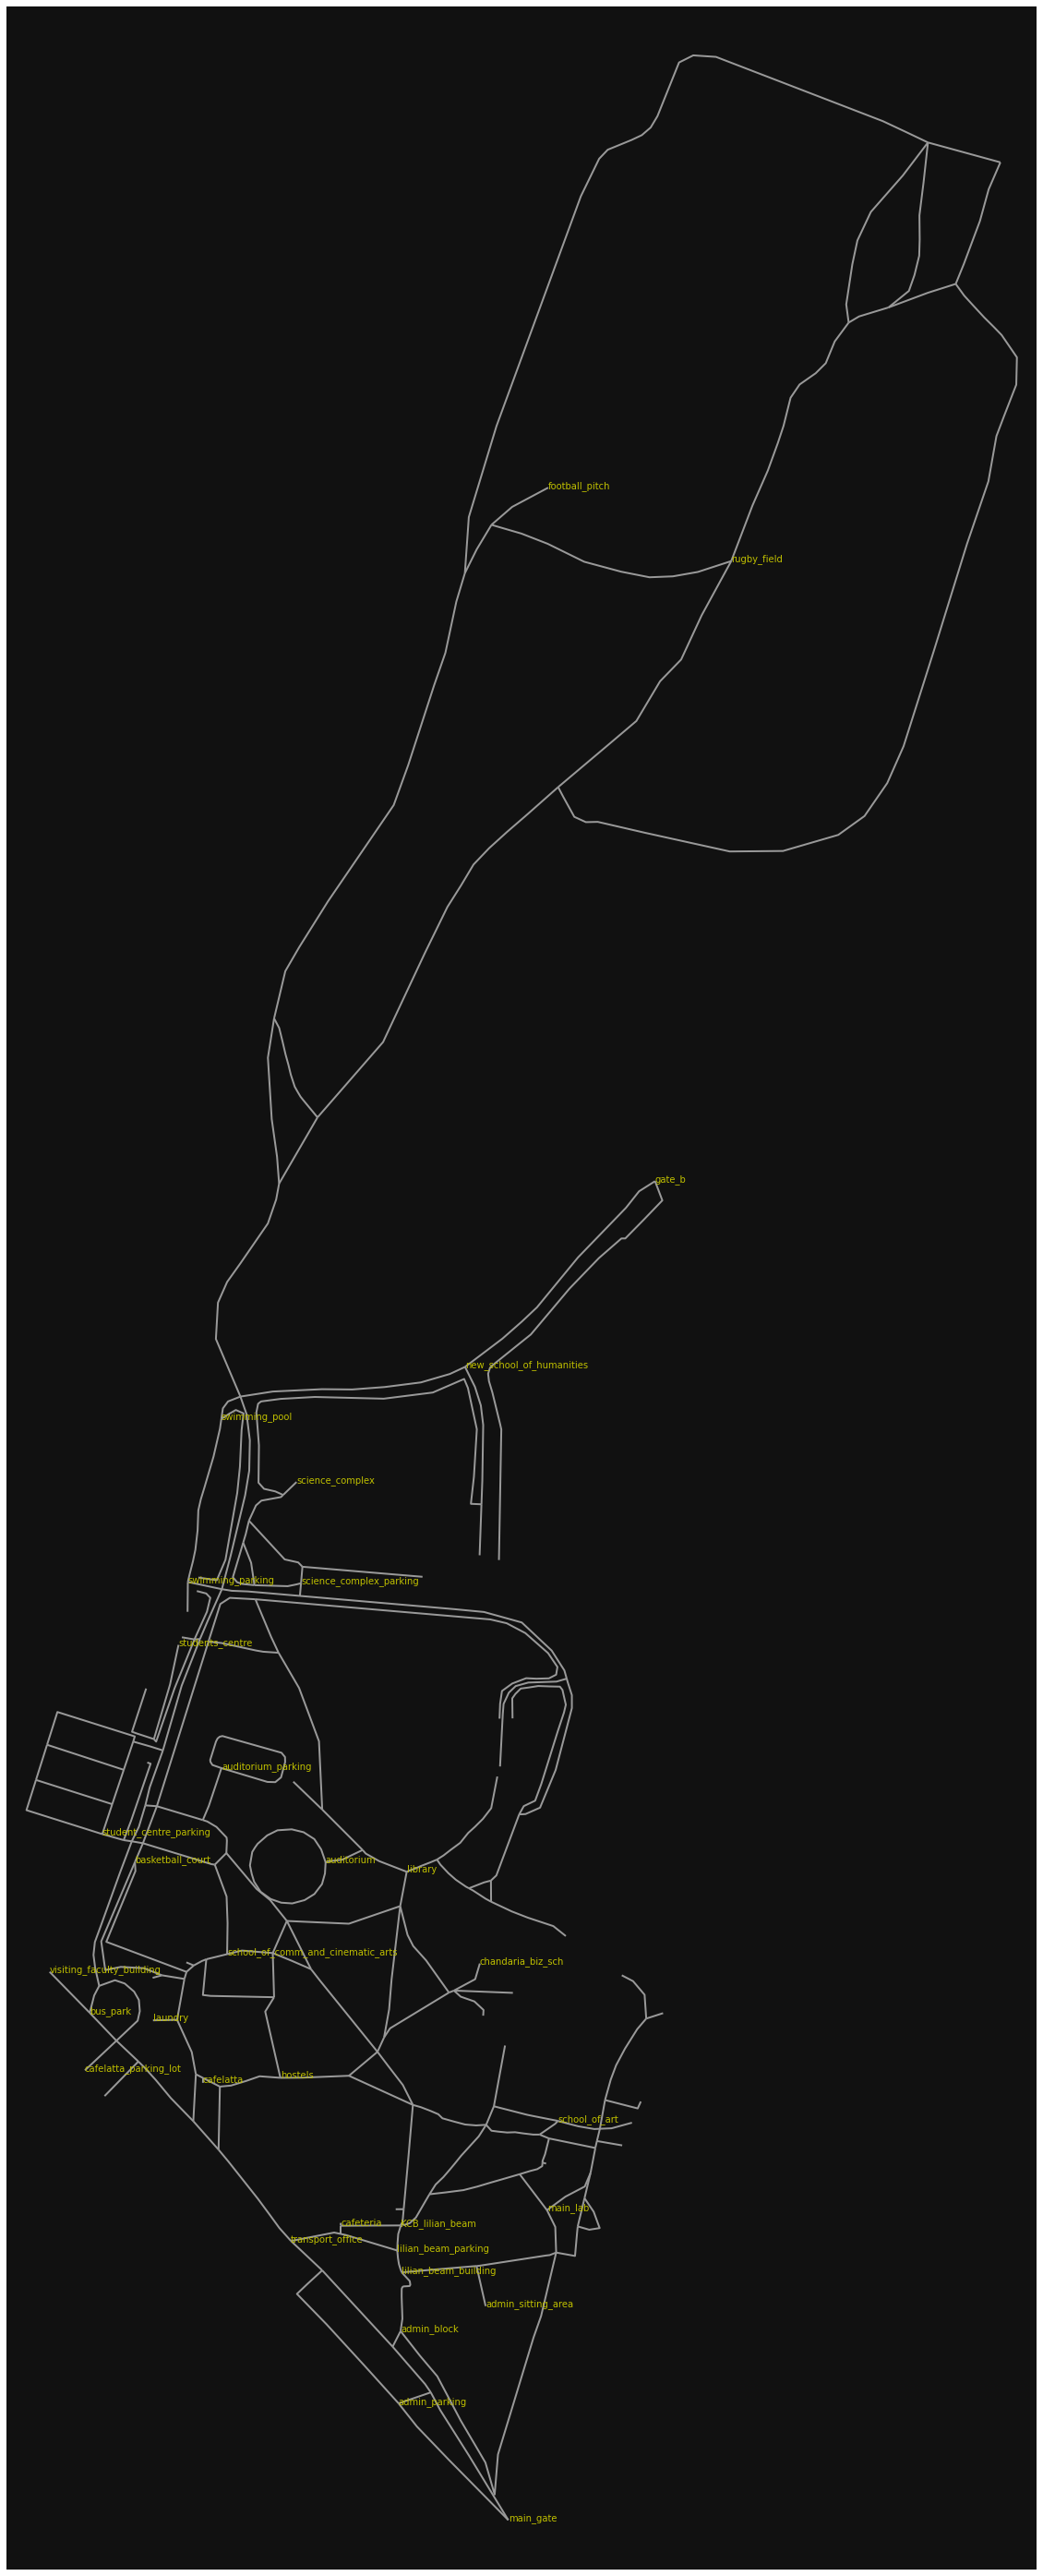

In [10]:
#  draw a map with location names

fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, node in ox.graph_to_gdfs(G, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = node['names']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')
plt.show()
#     print(node['label'])

In [11]:
# add general speed limit to dataframe
G1 = ox.add_edge_speeds(G, fallback=5)
n_nodes, n_edges = nodes, edges = ox.graph_to_gdfs(G1, nodes=True, edges=True)
# n_edges
# alculatespeed
G2 = ox.speed.add_edge_travel_times(G1)
# G2_edges = G2.edges(data=True)
n2_nodes, n2_edges = ox.graph_to_gdfs(G2, nodes=True, edges=True)
# n2_edges
# short_route = nx.shortest_path_length(G2, node1, node2, weight='length')
# short_route

In [12]:
n2_edges


osmid  highway        service  \
u          v          key                                                   
1416513551 5685627328 0                 128118266  service       driveway   
           6371344594 0                 684829295  footway            NaN   
           9265857869 0                 684829313  footway            NaN   
5685627328 9265767226 0    [128118266, 684829291]  service       driveway   
           9265767223 0                 597015771  service       driveway   
...                                           ...      ...            ...   
7409804397 7569493770 0                 792427225  service            NaN   
7409804415 9265767234 0                 792427227  service            NaN   
           7409804416 0                 792427229  service  parking_aisle   
9265767224 9265767225 0                1004228809  service            NaN   
9265767236 9265767237 0                 684829307  service       driveway   

                           oneway reversed   length  \
u          v          key                             
1416513551 5685627328 0     False     True   79.340   
           6371344594 0     False    False   36.656   
           9265857869 0     False    False  108.296   
5685627328 9265767226 0     False     True  149.977   
           9265767223 0     False    False   68.905   
...                           ...      ...      ...   
7409804397 7569493770 0     False     True  103.366   
7409804415 9265767234 0     False    False   15.035   
           7409804416 0     False     True   40.722   
9265767224 9265767225 0     False    False   60.811   
9265767236 9265767237 0     False     True   15.057   

                                                                    geometry  \
u          v          key                                                      
1416513551 5685627328 0    LINESTRING (36.87965 -1.21593, 36.87965 -1.215...   
           6371344594 0    LINESTRING (36.87931 -1.21685, 36.87933 -1.216...   
           9265857869 0    LINESTRING (36.87940 -1.21612, 36.87940 -1.216...   
5685627328 9265767226 0    LINESTRING (36.87844 -1.21556, 36.87914 -1.215...   
           9265767223 0    LINESTRING (36.87935 -1.21633, 36.87936 -1.216...   
...                                                                      ...   
7409804397 7569493770 0    LINESTRING (36.88129 -1.20896, 36.88118 -1.209...   
7409804415 9265767234 0    LINESTRING (36.87768 -1.21622, 36.87764 -1.21635)   
           7409804416 0    LINESTRING (36.87729 -1.21623, 36.87764 -1.21635)   
9265767224 9265767225 0    LINESTRING (36.87845 -1.21543, 36.87899 -1.21547)   
9265767236 9265767237 0    LINESTRING (36.87793 -1.21550, 36.87793 -1.21563)   

                                 from          to  length2  speed_kph  \
u          v          key                                               
1416513551 5685627328 0    5685627328  1416513551     79.0        5.0   
           6371344594 0    6371344594  1416513551     37.0        5.0   
           9265857869 0    9265857869  1416513551    108.0        5.0   
5685627328 9265767226 0    9265767226  5685627328    150.0        5.0   
           9265767223 0    9265767223  5685627328     69.0        5.0   
...                               ...         ...      ...        ...   
7409804397 7569493770 0    7569493770  7409804397    103.0        5.0   
7409804415 9265767234 0    9265767234  7409804415     15.0        5.0   
           7409804416 0    7409804416  7409804415     41.0        5.0   
9265767224 9265767225 0    9265767225  9265767224     61.0        5.0   
9265767236 9265767237 0    9265767237  9265767236     15.0        5.0   

                           travel_time  
u          v          key               
1416513551 5685627328 0           57.1  
           6371344594 0           26.4  
           9265857869 0           78.0  
5685627328 9265767226 0          108.0  
           9265767223 0           49.6  
...                                ...  
7409804

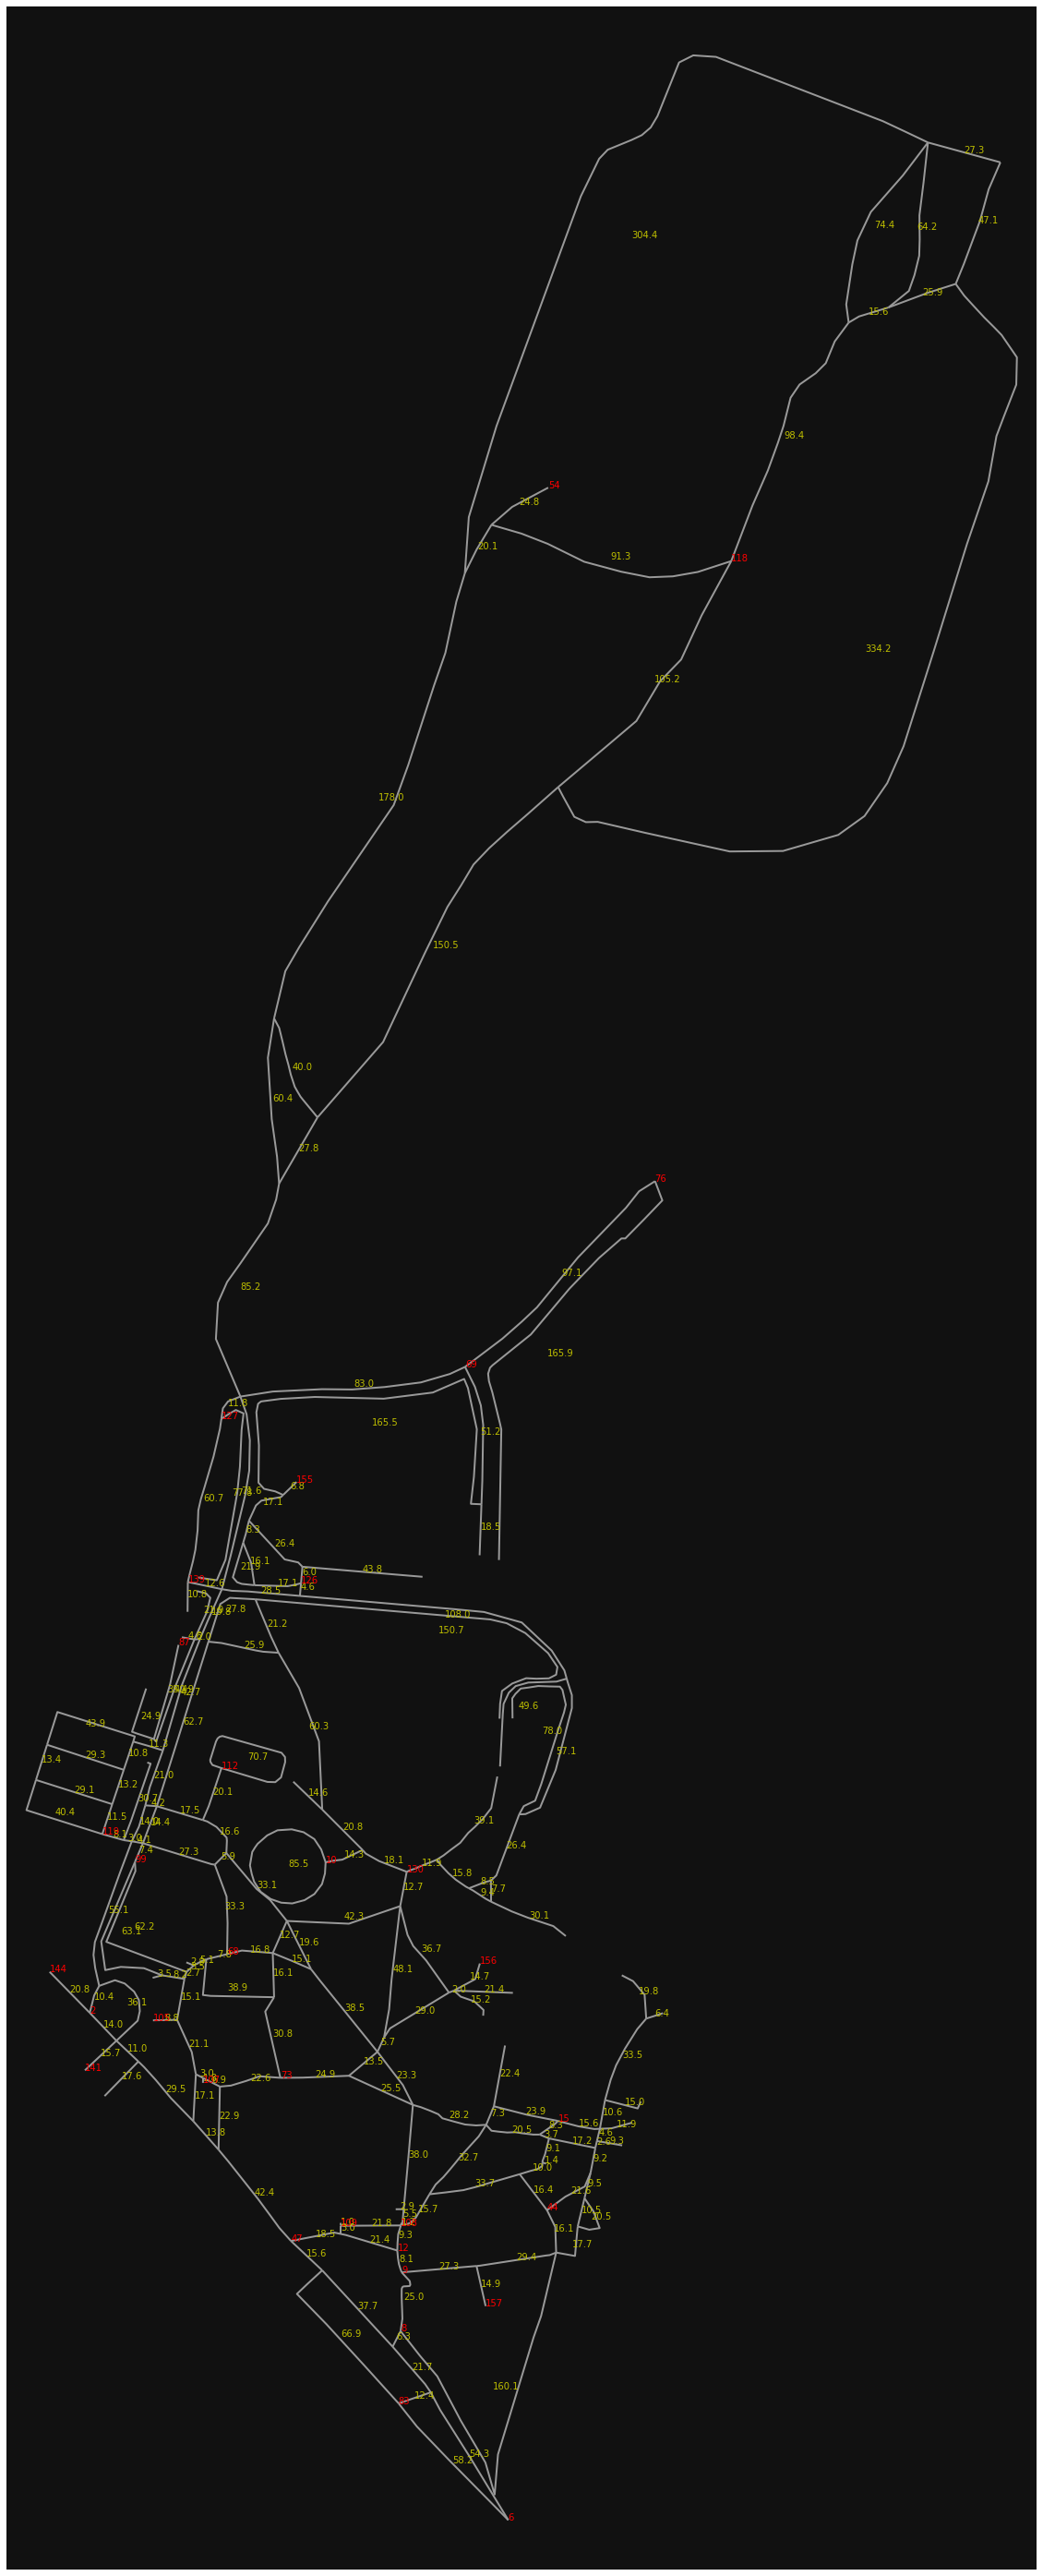

In [13]:
#  draw the map with key nodes
fig, ax = ox.plot_graph(G2, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, edges in ox.graph_to_gdfs(G2, nodes=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = edges['travel_time']
    
    c = edges['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')

for _, node in ox.graph_to_gdfs(G2, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt_lbl = node['newlbls']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt_lbl, (c.x, c.y), c='r')
plt.show()

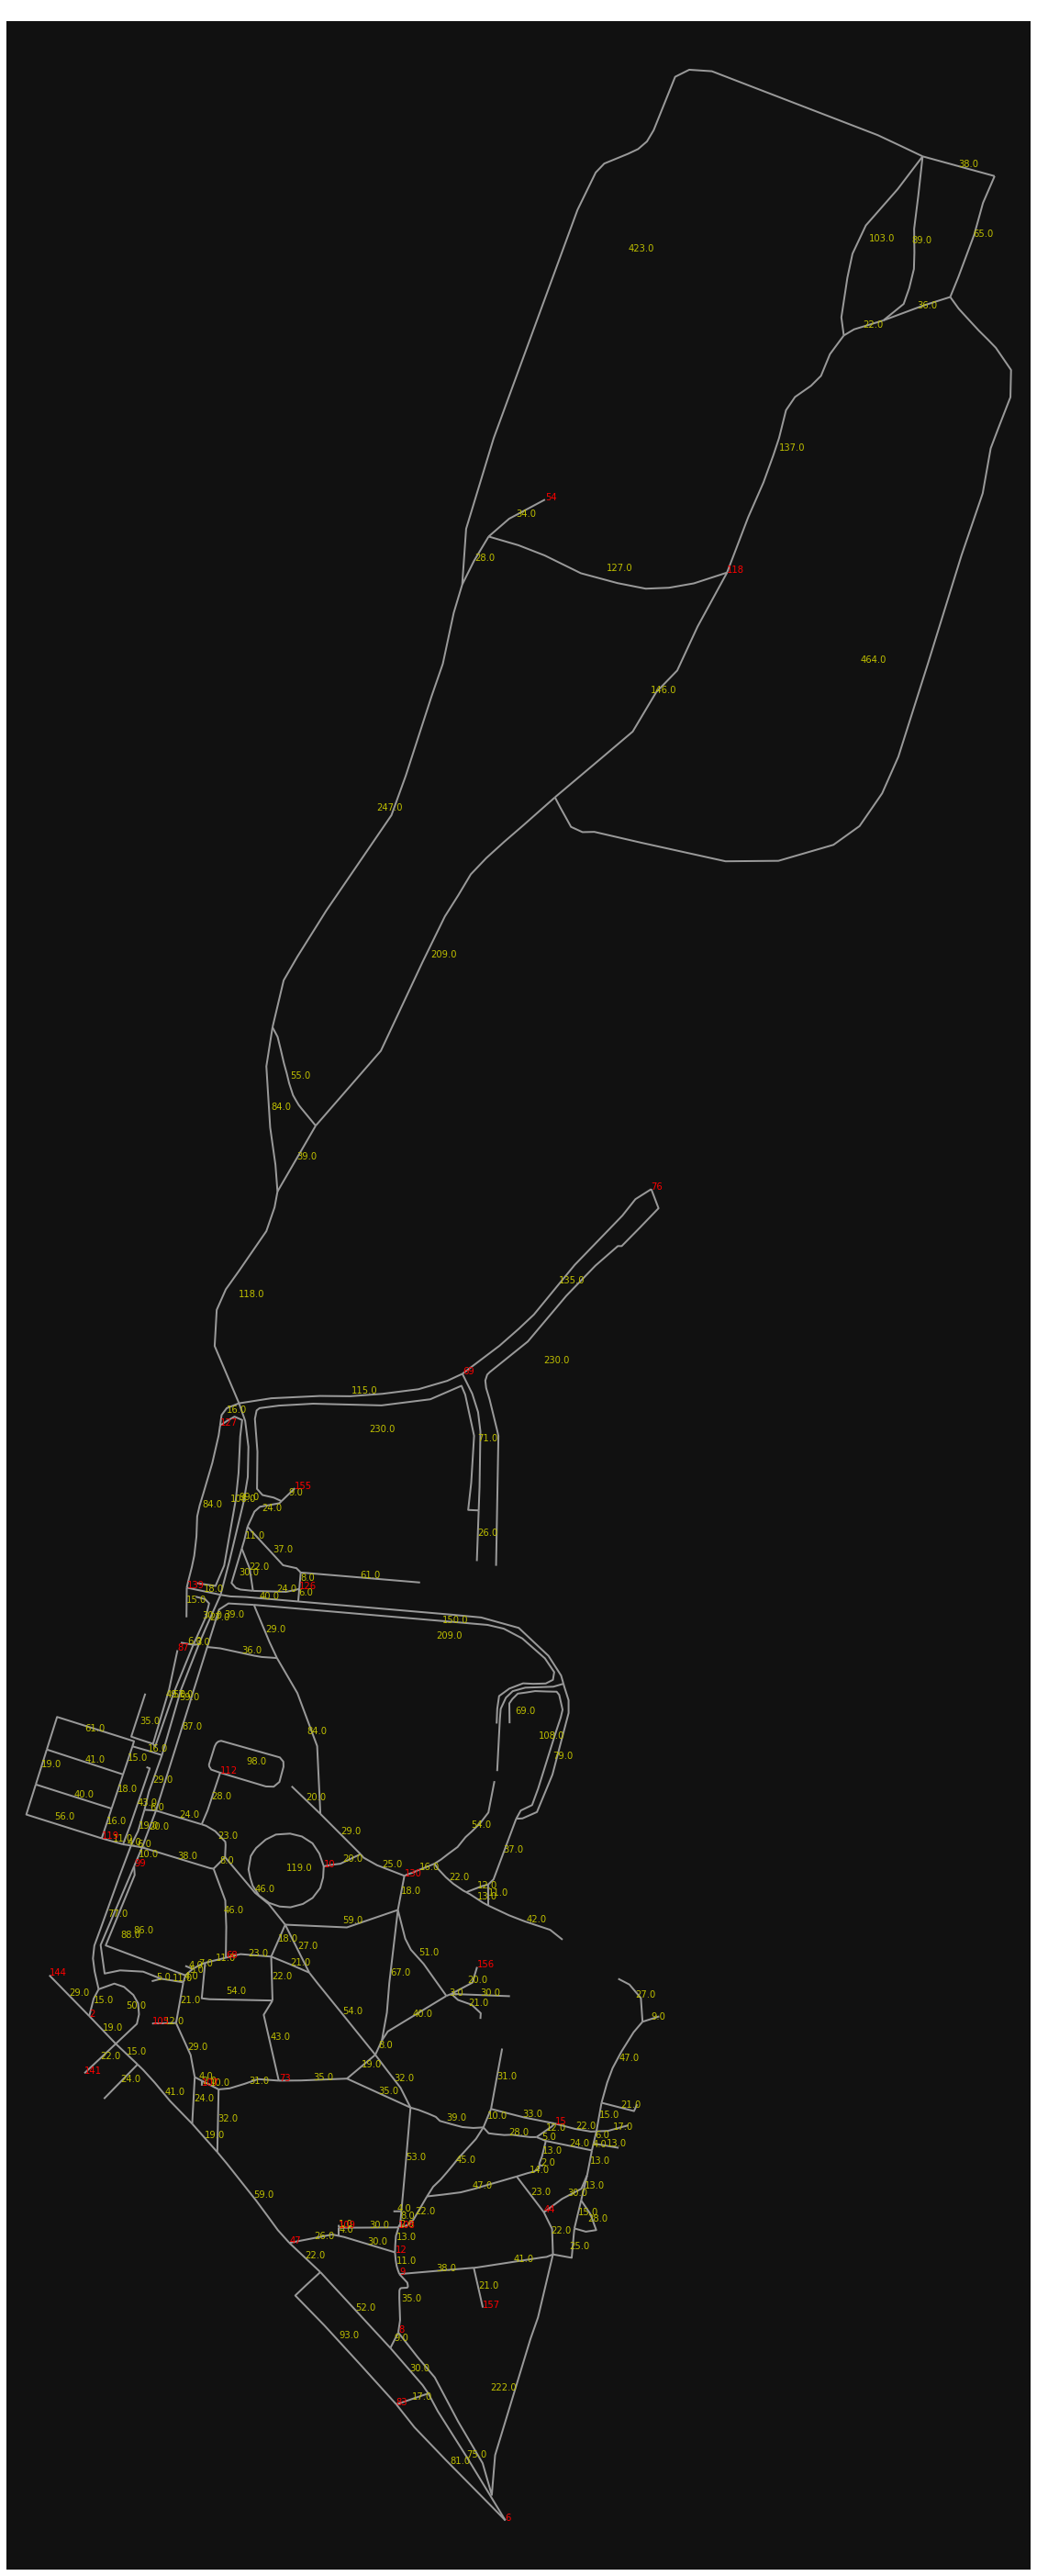

In [14]:
#  draw the map with key nodes
from matplotlib.pyplot import title


fig, ax = ox.plot_graph(G2, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, edges in ox.graph_to_gdfs(G2, nodes=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = edges['length2']
    
    c = edges['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')

for _, node in ox.graph_to_gdfs(G2, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt_lbl = node['newlbls']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt_lbl, (c.x, c.y), c='r')
plt.title('Graph while walking with distances',c='w')
plt.show()

In [28]:
    #  Cost in secs
cost = {
    str(["6", "83"]): "60", str(["6", "8"]): "55", str(["6", "157"]): "206", str(["6", "44"]): "178",
    str(["6", "15"]): "240", str(["6", "47"]): "20",
    str(["83", "6"]): "60", str(["83", "8"]): "42", str(["83", "47"]): "54",
    str(["47", "107"]): "75", str(["47", "109"]): "24", str(["47", "141"]): "108", str(["47", "8"]): "92",
    str(["47", "83"]): "54",
    str(["8", "83"]): "42", str(["8", "6"]): "55", str(["8", "9"]): "25", str(["8", "47"]): "92",
    str(["9", "8"]): "25", str(["9", "12"]): "9", str(["9", "157"]): "43",
    str(["109", "108"]): "23", str(["109", "12"]): "26", str(["109", "47"]): "24",
    str(["157", "9"]): "43", str(["157", "44"]): "62", str(["157", "6"]): "206",
    str(["73", "107"]): "28", str(["73", "68"]): "65", str(["73", "156"]): "91", str(["73", "130"]): "107",
    str(["73", "10"]): "116", str(["73", "15"]): "110",
    str(["107", "73"]): "28", str(["107", "105"]): "27", str(["107", "47"]): "75", str(["107", "141"]): "62",
    str(["44", "6"]): "178", str(["44", "157"]): "62", str(["44", "15"]): "51", str(["44", "108"]): "69",
    str(["156", "130"]): "67", str(["156", "73"]): "91", str(["156", "108"]): "120", str(["156", "68"]): "124",
    str(["156", "15"]): "135",
    str(["130", "10"]): "24", str(["130", "156"]): "67", str(["130", "73"]): "107", str(["130", "68"]): "75",
    str(["130", "108"]): "136", str(["130", "15"]): "150",
    str(["10", "130"]): "24", str(["10", "73"]): "116", str(["10", "68"]): "59", str(["10", "112"]): "68",
    str(["10", "99"]): "71", str(["10", "119"]): "61",
    str(["141", "2"]): "14", str(["141", "144"]): "35", str(["141", "47"]): "108", str(["141", "107"]): "62",
    str(["2", "141"]): "14", str(["2", "144"]): "13", str(["2", "99"]): "66",
    str(["99", "2"]): "66", str(["99", "119"]): "17", str(["99", "112"]): "64", str(["99", "10"]): "71",
    str(["99", "68"]): "70", str(["99", "105"]): "89",
    str(["112", "119"]): "64", str(["112", "99"]): "64", str(["112", "10"]): "68", str(["112", "87"]): "88",
    str(["112", "68"]): "78",
    str(["87", "139"]): "30", str(["87", "119"]): "82", str(["87", "126"]): "54", str(["87", "112"]): "88",
    str(["155", "126"]): "85", str(["155", "139"]): "50", str(["155", "127"]): "44",
    str(["69", "76"]): "98", str(["69", "127"]): "95",
    str(["144", "2"]): "13", str(["144", "141"]): "35", str(["144", "15"]): "35",
    str(["87", "139"]): "24", str(["87", "119"]): "41", str(["87", "126"]): "54", str(["87", "112"]): "81",
    str(["68", "105"]): "22", str(["68", "73"]): "65", str(["68", "99"]): "70", str(["68", "130"]): "75",
    str(["68", "119"]): "44", str(["68", "108"]): "80", str(["68", "156"]): "124", str(["68", "10"]): "59",
    str(["68", "112"]): "78",
    str(["12", "108"]): "10", str(["12", "9"]): "9", str(["12", "109"]): "26",
    str(["108", "12"]): "10", str(["108", "109"]): "23", str(["108", "73"]): "54", str(["108", "15"]): "79",
    str(["108", "130"]): "136", str(["108", "156"]): "120", str(["108", "10"]): "105", str(["108", "68"]): "80",
    str(["108", "44"]): "69", str(["108", "107"]): "69",
    str(["119", "87"]): "82", str(["119", "99"]): "17", str(["119", "112"]): "64", str(["119", "10"]): "61",
    str(["127", "139"]): "62", str(["127", "155"]): "44", str(["127", "69"]): "95", str(["127", "54"]): "382",
    str(["127", "118"]): "381", str(["127", "126"]): "108",
    str(["139", "127"]): "62", str(["139", "87"]): "30", str(["139", "126"]): "42", str(["139", "155"]): "50",
    str(["105", "107"]): "27", str(["105", "68"]): "22", str(["105", "99"]): "89",
    str(["126", "139"]): "42", str(["126", "155"]): "85", str(["126", "127"]): "108", str(["126", "87"]): "54",
    str(["76", "69"]): "98",
    str(["54", "127"]): "382", str(["54", "118"]): "117",
    str(["118", "54"]): "117", str(["118", "127"]): "381",
    str(["15", "6"]): "240", str(["15", "44"]): "51", str(["15", "108"]): "79", str(["15", "73"]): "110",
    str(["15", "130"]): "150", str(["15", "156"]): "135",
}
print(type(cost))

<class 'dict'>


## Change costs to distance

In [32]:
node_keys = []
distances = []
for k, v in cost.items():
    # print(int(nd) * 5)
    dst = int(v) * 5
    node_keys.append(k)
    distances.append(dst)
    # print(f"key: {k}")
    # print(f"value: {dst}")
# print(node_keys)
# print(distances)

# dictionary of costs in meters
cost_dist = dict(zip(node_keys, distances))
print(cost_dist)

{"['6', '83']": 300, "['6', '8']": 275, "['6', '157']": 1030, "['6', '44']": 890, "['6', '15']": 1200, "['6', '47']": 100, "['83', '6']": 300, "['83', '8']": 210, "['83', '47']": 270, "['47', '107']": 375, "['47', '109']": 120, "['47', '141']": 540, "['47', '8']": 460, "['47', '83']": 270, "['8', '83']": 210, "['8', '6']": 275, "['8', '9']": 125, "['8', '47']": 460, "['9', '8']": 125, "['9', '12']": 45, "['9', '157']": 215, "['109', '108']": 115, "['109', '12']": 130, "['109', '47']": 120, "['157', '9']": 215, "['157', '44']": 310, "['157', '6']": 1030, "['73', '107']": 140, "['73', '68']": 325, "['73', '156']": 455, "['73', '130']": 535, "['73', '10']": 580, "['73', '15']": 550, "['107', '73']": 140, "['107', '105']": 135, "['107', '47']": 375, "['107', '141']": 310, "['44', '6']": 890, "['44', '157']": 310, "['44', '15']": 255, "['44', '108']": 345, "['156', '130']": 335, "['156', '73']": 455, "['156', '108']": 600, "['156', '68']": 620, "['156', '15']": 675, "['130', '10']": 120, "[

In [ ]:
g_heuristics = {
    6: ["475"],
    83: ["212"],
    47: ["120"],
    8: ["165"],
    9: ["148"],
    109:["109"],
    157:["148"],
    73: ["65"],
    107:["64"],
    44: ["207"],
    156:["125"],
    130:["105"],
    10: ["72"],
    141:["69"],
    2: ["79"],
    99: ["55"],
    112:["90"],
    87: ["143"],
    155:["253"],
    69: ["324"],
    144:["89"],
    68: ["10"],
    12: ["142"],
    108:["130"],
    119:["69"],
    127:["278"],
    139:["183"],
    105:["45"],
    126: ["204"],
    76: ["454"],
    54: ["888"],
    118:["940"],
    15: ["204"]
}

In [36]:
from statistics import mean


max_dst = max(distances)
print(max_dst)

min_dst = min(distances)
print(min_dst)

mean_dst = np.round(mean(distances))
print(mean_dst)

1910
45
401.0


In [43]:
import random
dist_keys = []
dist_heurs = []
for i in key_nodes:
    dist_list = []
    dist_list.append(str(random.randint(10, 25)))
    dist_heurs.append(dist_list)
    dist_keys.append(str(i))
    
distHeuristics4 = dict(zip(dist_keys, dist_heurs))

# print(dist_heurs)
print(distHeuristics4)

{'6': ['18'], '83': ['21'], '47': ['25'], '8': ['11'], '9': ['20'], '109': ['23'], '157': ['20'], '73': ['21'], '107': ['16'], '44': ['14'], '156': ['18'], '130': ['15'], '10': ['17'], '141': ['25'], '2': ['24'], '99': ['11'], '112': ['15'], '87': ['15'], '155': ['25'], '69': ['20'], '144': ['25'], '68': ['25'], '12': ['16'], '108': ['22'], '119': ['22'], '127': ['16'], '139': ['16'], '105': ['12'], '126': ['18'], '76': ['11'], '54': ['11'], '118': ['10'], '15': ['14']}


In [ ]:
vh_cost = {
    str(["6", "83"]): "60",
    str(["83", "6"]): "60", str(["83", "47"]): "54",
    str(["47", "109"]): "24", str(["47", "141"]): "108", str(["47", "83"]): "54",
    str(["9", "12"]): "9",
    str(["108", "12"]): "10", str(["108", "109"]): "23",
    str(["109", "108"]): "23", str(["109", "12"]): "26", str(["109", "47"]): "24",
    str(["141", "2"]): "14", str(["141", "47"]): "108",
    str(["2", "141"]): "14", str(["2", "99"]): "66",
    str(["99", "2"]): "66", str(["99", "119"]): "17", str(["99", "112"]): "64",
    str(["112", "99"]): "64", str(["112", "126"]): "128",
    str(["69", "76"]): "98", str(["69", "127"]): "95",
    str(["144", "2"]): "13",
    str(["12", "109"]): "26", str(["12", "9"]): "9",
    str(["119", "99"]): "17", str(["119", "112"]): "64",
    str(["127", "54"]): "382", str(["127", "118"]): "381", str(["127", "69"]): "95",
    str(["126", "127"]): "108",
    str(["76", "69"]): "98",
    str(["54", "127"]): "382", str(["54", "118"]): "117",
    str(["118", "54"]): "117", str(["118", "127"]): "381",
}